# Milestone 3: AirBnB Barcelona

For this Milestone, I will be working with 2 datasets downloaded from https://insideairbnb.com/get-the-data/:

- Barcelona, Catalonia, Spain. 12 December, 2024
- Barcelona, Catalonia, Spain. 20 March, 2024

I aim to compare them, and inquire if there has been an increment of rentals and prices over time.

## Notebook contents

1. Exploratory analysis of the datasets

## 1. Exploratory analysis of the datasets

### A. Importing datasets & understanding their structure

In [2]:
# Import libraries to be used

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import datasets

data_dec = pd.read_csv("/Users/maria/Documents/CodeOP/02_GitHub/Assigments/MODULE-3/milestone_3/data/listings_BCN_Dec_24.csv")
data_mar = pd.read_csv("/Users/maria/Documents/CodeOP/02_GitHub/Assigments/MODULE-3/milestone_3/data/listings_BCN_Mar_24.csv")


In order to merge both datasets, we need to chek if they have the same attributes.

In [38]:
# Visualizing dataset structure
pd.set_option('display.max_columns', None)  # Show all columns
data_dec.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20241212051318,2024-12-12,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,99%,89%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,46.0,50.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.17262,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Refrigerator"", ""30 inch TV"", ""Free street pa...",$119.00,1,1125,1,5,1125,1125,3.4,1125.0,NaN,t,2,10,10,10,2024-12-12,45,5,0,2013-05-27,2024-09-16,4.39,4.48,4.59,4.73,4.70,4.80,4.32,HUTB-002062,t,29,29,0,0,0.32
1,23197,https://www.airbnb.com/rooms/23197,20241212051318,2024-12-12,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi there, \nI'm marnie from Australia, though ...",within an hour,100%,93%,t,https://a0.muscache.com/im/pictures/user/44b56...,https://a0.muscache.com/im/pictures/user/44b56...,El Besòs i el Maresme,6.0,13.0,"['email', 'phone']",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.412432,2.21975,Entire rental unit,Entire home/apt,5,2.0,2 baths,3.0,4.0,"[""Refrigerator"", ""Bed linens"", ""Freezer"", ""Fre...",$219.00,3,32,3,7,1125,1125,3.6,1125.0,NaN,t,17,41,71,236,2024-12-12,81,7,0,2011-03-15,2024-10-24,4.80,4.94,4.90,4.94,4.99,4.63,4.65,HUTB005057,f,1,1,0,0,0.48
2,32711,https://www.airbnb.com/rooms/32711,20241212051318,2024-12-12,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within an hour,100%,99%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,3.0,15.0,"['email', 'phone', 'work_email']",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.17015,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,3.0,"[""Re

In [5]:
data_mar.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,...,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,...,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.com/rooms/97529,20240320024717,2024-03-20,previous scrape,Furnished one bedroom apartment with bathroom,Fully furnished one bedoom apartment with bath...,Located 800 meters from the Temple of the Sagr...,https://a0.muscache.com/pictures/b6b1d492-6efa...,497450,...,4.91,4.45,4.71,NaN,f,1,1,0,0,0.45
4,110041,https://www.airbnb.com/rooms/110041,20240320024717,2024-03-20,city scrape,002. Alió 2 Apartment,A spectacular newly constructed apartment havi...,NaN,https://a0.muscache.com/pictures/24f2fe9f-61b6...,396363,...,4.41,4.65,4.11,HUTB-003671,f,95,95,0,0,0.38


In [6]:
# Let's check the numer of rows and colums of both datasets to get and idea of how big they are
print(f"data_dec:", data_dec.shape)
print(f"data_mar:", data_mar.shape)


data_dec: (19455, 75)
data_mar: (18519, 75)


Both datasets present the same number of columns. 
There are more rows in December, which this means an increase in the number of apparments announced over time.

In [ ]:
# Now let's check if the columns are exactly the same.

data_dec.columns == data_mar.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Since the columns are all the same, let's keep the basic EDA only with the "data_dec" for the moment.

In [37]:
# Checking columns variable type
pd.set_option('display.max_rows', None)  # Show all rows
data_dec.dtypes.sort_values(ascending=False)

host_thumbnail_url                               object
amenities                                        object
host_neighbourhood                               object
has_availability                                 object
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
calendar_last_scraped                            object
first_review                                     object
property_type                                    object
room_type                                        object
last_review                                      object
price                                            object
bathrooms_text                                   object
host_picture_url                                

We can see different types of variables:

a) **object** (=string). This includes **categorical features** (ex: amenities, neighbourhood), **links** (ex: host_url, picture_url), **text** (ex: last_review, name), **bool** (as t = TRUE and f = FALSE, ex: host_is_superhost), **price** & **dates** (ex: calendar_last_scraped, host_since)

b) **float64** (=float). This inclues **ratings** (ex: review_scores_location), **counts** (ex: host_listings_count, minimum_nights_avg_ntm, bathrooms) or **location** (ex: latitude, longitude).

c) **int64** (=integer). This includes **counts** (ex: maximum_nights, number_of_reviews, accommodates, calculated_host_listings_count_private_rooms) and **ids** (ex: host_id, id, scrape_id).

In [ ]:
# Are there any Null values?
pd.set_option('display.max_rows', None)  # Show all rows
data_dec.isnull().sum().sort_values(ascending=False)

calendar_updated                                19455
host_neighbourhood                               9811
neighborhood_overview                            9664
neighbourhood                                    9664
host_about                                       7214
license                                          6253
review_scores_checkin                            4994
review_scores_value                              4993
review_scores_location                           4993
review_scores_accuracy                           4993
review_scores_cleanliness                        4992
review_scores_communication                      4991
reviews_per_month                                4990
last_review                                      4990
first_review                                     4990
review_scores_rating                             4990
host_location                                    4396
beds                                             3847
bathrooms                   

There are many columns with Null values, we'll have to take this into account for later analysis.

In [49]:
# Are there any duplicate rows?
print(f"duplicates in data_dec:", data_dec.duplicated().sum())
print(f"duplicates in data_mar:", data_mar.duplicated().sum())

duplicates in data_dec: 0
duplicates in data_mar: 0


We don't need to worry about duplicate rows in any of the datasets.

### B. Initial visualization of number of listings and prices

In [ ]:
# Let's see the change in number of listings over time

total_mar = data_mar["id"].nunique()
total_dec = data_dec["id"].nunique()

print(f"Total Listings in March: {total_mar}")
print(f"Total Listings in December: {total_dec}")
print(f"Increase in Listings: {total_dec - total_mar}")

Total Listings in March: 18519
Total Listings in December: 19455
Increase in Listings: 936


I'm interested in seeing the geographical distribution of the listings


In [64]:
# What are the neighbourhoods that appear?
data_mar["neighbourhood"].value_counts().sort_index(ascending=False)

neighbourhood
Барселона, Каталония, Spain                        2
Барселона, Barcelona, Spain                        2
barcelona, Barcelona, Spain                        2
barcelona , barcelona, Spain                       1
Spain                                              2
Sant Adrià de Besòs, Spain                         1
Sant Adrià de Besòs, Catalunya, Spain              5
Sant Adrià de Besòs, Catalonia, Spain              1
Sant Adrià De Besòs, Catalunya, Spain              1
Sant Adria de Besos, Barcelona, Spain              1
Sagrada Familia, Barcelona, Catalonia, Spain       1
L'Hospitalet de Llobregat, Catalunya, Spain        7
Gràcia, Barcelona, Spain                           1
Gracia-Barcelona, Spain                            1
Gotico, Barcelona, Catalonia, Spain                2
El Masnou, Catalonia, Spain                        1
Eixample, Barcelona, Spain                         3
Ciutat Vella, Catalunya, Spain                     1
Catalunya , Spain               

In [ ]:
# We are lucky, and the neighbourhood information has already been cleaned and saved as "neighbourhood_group_cleansed"

data_mar["neighbourhood_group_cleansed"].value_counts().sort_index(ascending=False)

neighbourhood_group_cleansed
Sarrià-Sant Gervasi     974
Sants-Montjuïc         1933
Sant Martí             1684
Sant Andreu             288
Nou Barris              206
Les Corts               379
Horta-Guinardó          529
Gràcia                 1556
Eixample               6704
Ciutat Vella           4266
Name: count, dtype: int64

Let's see the distribution of the listings in each timepoint

/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/2401634441.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="count",
/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/2401634441.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)


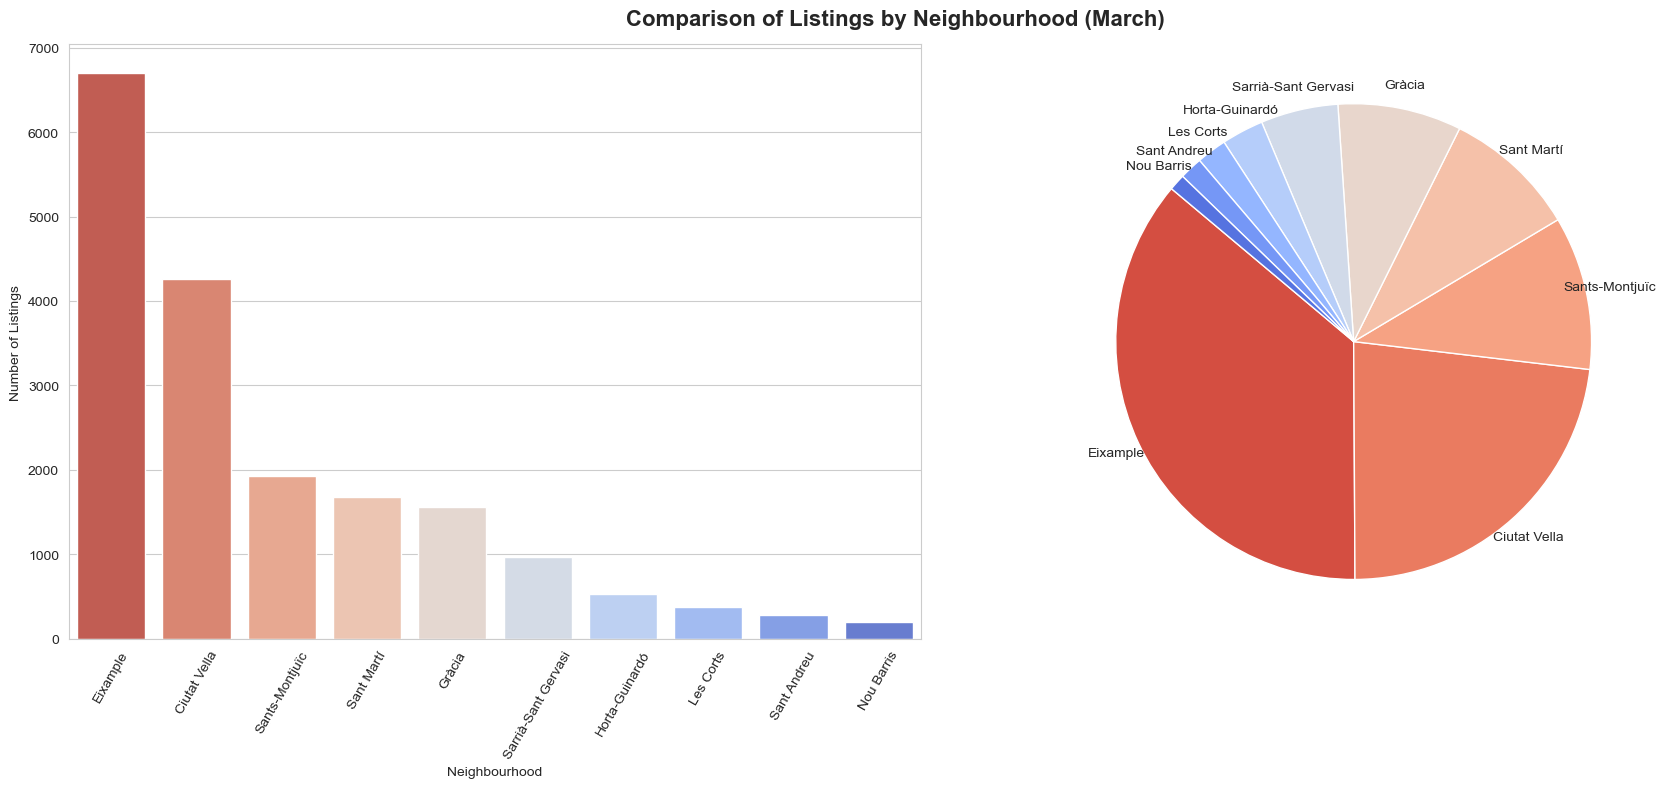

In [ ]:
# Let's see the distribution of the listings in March
# We'll draw both a barchart (to see total counts) and a piechart (too see the proportions)

# Apply Seaborn style
sns.set_style("whitegrid")

# Count number of listings per neighborhood
neighbourhood_counts = data_mar["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_counts.columns = ["neighbourhood_group_cleansed", "count"]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle("Comparison of Listings by Neighbourhood (March)", fontsize=16, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_counts))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="count", 
            palette=bar_colors, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel("Neighbourhood")
axes[0].set_ylabel("Number of Listings")

# --- Pie Chart ---
wedges, texts = axes[1].pie(neighbourhood_counts["count"], labels=neighbourhood_counts["neighbourhood_group_cleansed"], 
                            startangle=140, colors=bar_colors,
                            labeldistance=1.1, pctdistance=0.85)

# Align text in the pie chart to avoid overlapping
for text in texts:
    text.set_ha('center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()


**Observations**

By having a look at these graphs, we can see that the AirBnB listings in March 2024 are **not equally distributed** throught Barcelona. Instead, more than 50% are found only in Exiample and Ciutat Vella. On the other hand, Sant Andre and Nou Barris are the two neighborhoods with the least amount of listings.

/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/1127993108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="count",
/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/1127993108.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)


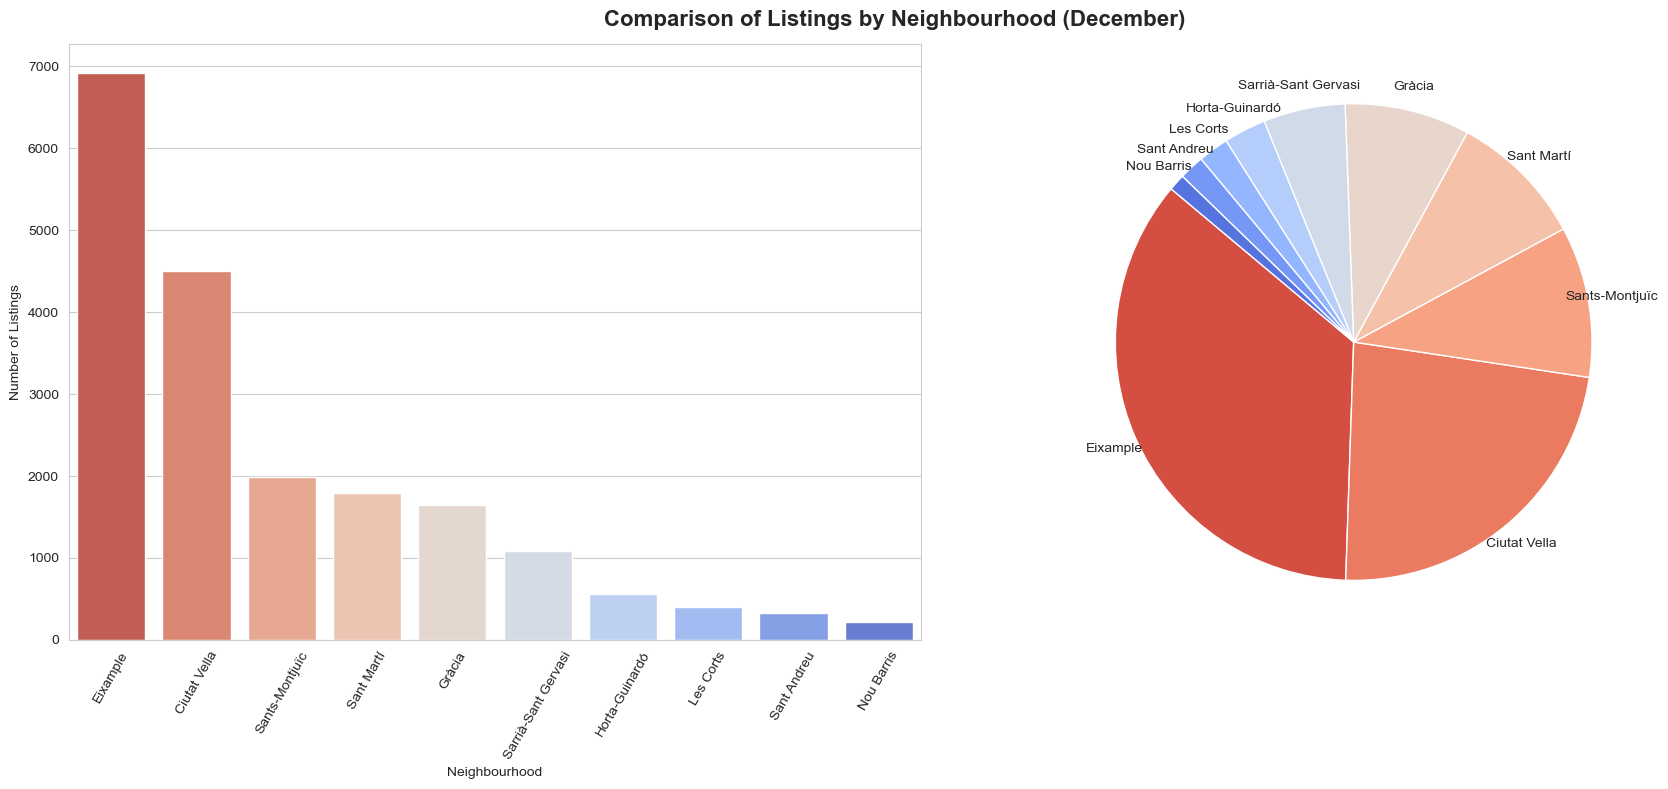

In [114]:
# Let's do the same but for the December dataset

# Apply Seaborn style
sns.set_style("whitegrid")

# Count number of listings per neighborhood
neighbourhood_counts = data_dec["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_counts.columns = ["neighbourhood_group_cleansed", "count"]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle("Comparison of Listings by Neighbourhood (December)", fontsize=16, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_counts))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="count", 
            palette=bar_colors, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel("Neighbourhood")
axes[0].set_ylabel("Number of Listings")

# --- Pie Chart ---
wedges, texts = axes[1].pie(neighbourhood_counts["count"], labels=neighbourhood_counts["neighbourhood_group_cleansed"], 
                            startangle=140, colors=bar_colors,
                            labeldistance=1.1, pctdistance=0.85)

# Align text in the pie chart to avoid overlapping
for text in texts:
    text.set_ha('center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()


**Observations**

The distribution of AirBnb listings in December 2024 is very similar to the one we observed in March 2024.

It would be interesting to see what is the distribution of the new listings is, and if it follows the same trend.

/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/1540217545.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="new_listings",
/var/folders/xk/plgt8lts2_72l0rtt_cz7k6h0000gn/T/ipykernel_74640/1540217545.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)


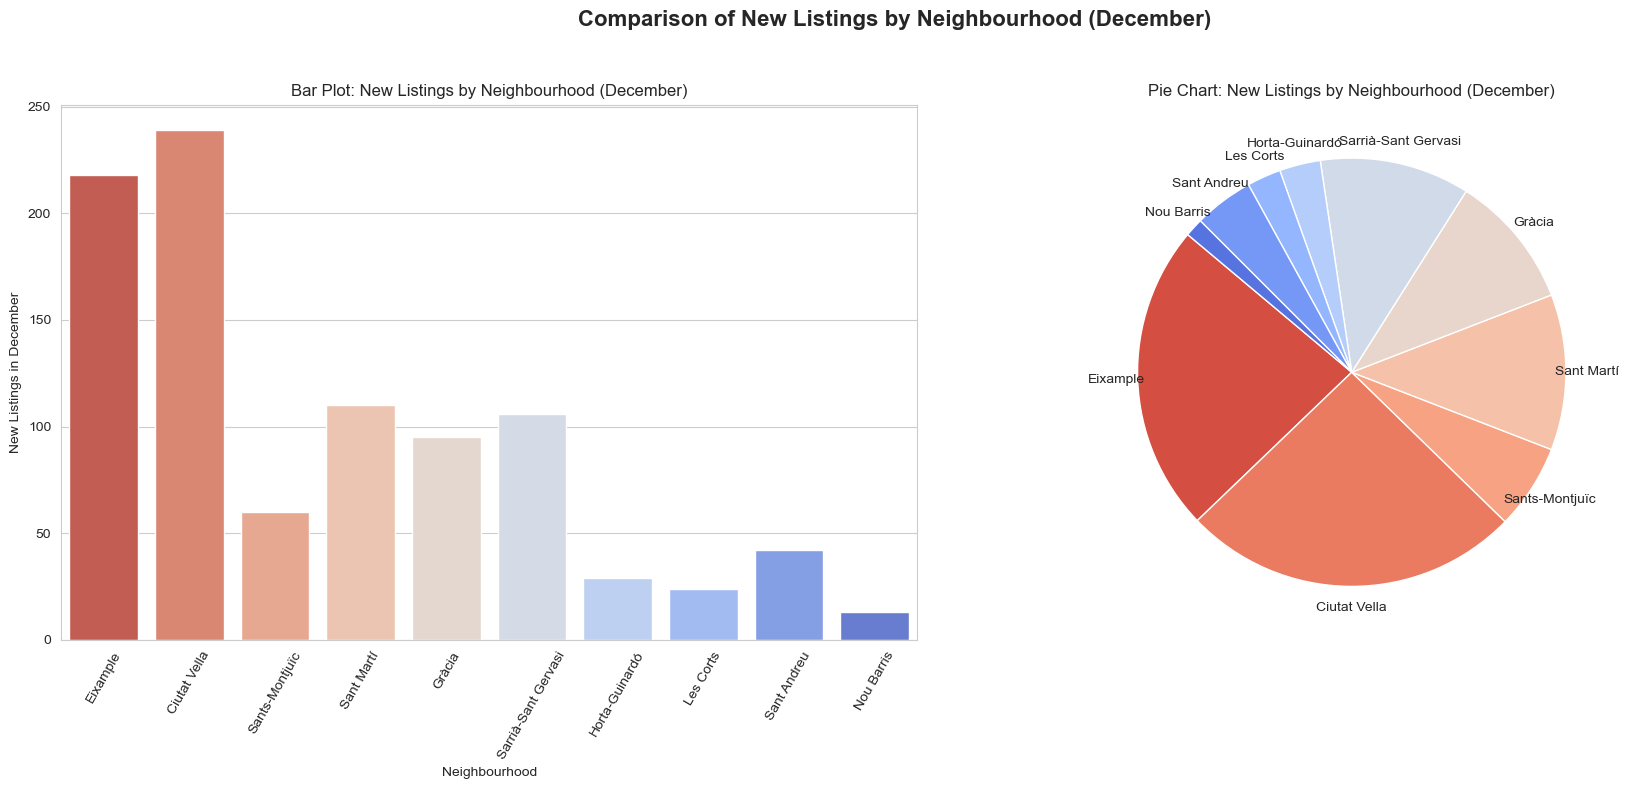

In [116]:
# Finally, let's see the distribution of only the new listings that appear in December but where not yet listed in March.

# Apply Seaborn style
sns.set_style("whitegrid")

# Count listings per neighborhood in December
neighbourhood_dec = data_dec["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_dec.columns = ["neighbourhood_group_cleansed", "december_count"]

# Count listings per neighborhood in March
neighbourhood_mar = data_mar["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_mar.columns = ["neighbourhood_group_cleansed", "march_count"]

# Merge both datasets (outer join to keep all neighborhoods)
neighbourhood_counts = pd.merge(neighbourhood_dec, neighbourhood_mar, on="neighbourhood_group_cleansed", how="left").fillna(0)

# Calculate new listings in December (listings that were not in March)
neighbourhood_counts["new_listings"] = neighbourhood_counts["december_count"] - neighbourhood_counts["march_count"]

# Keep only positive values (new listings)
neighbourhood_counts = neighbourhood_counts[neighbourhood_counts["new_listings"] > 0]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle("Comparison of New Listings by Neighbourhood (December)", fontsize=16, fontweight="bold")

# Generate the same color palette for both plots
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_counts))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_counts, x="neighbourhood_group_cleansed", y="new_listings", 
            palette=bar_colors, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel("Neighbourhood")
axes[0].set_ylabel("New Listings in December")
axes[0].set_title("Bar Plot: New Listings by Neighbourhood (December)")

# --- Pie Chart ---
wedges, texts = axes[1].pie(neighbourhood_counts["new_listings"], labels=neighbourhood_counts["neighbourhood_group_cleansed"], 
                            startangle=140, colors=bar_colors,
                            labeldistance=1.1, pctdistance=0.85)

# Align text in the pie chart to avoid overlapping
for text in texts:
    text.set_ha('center')

# Add a title to the pie chart
axes[1].set_title("Pie Chart: New Listings by Neighbourhood (December)")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the combined plots
plt.show()

**Observations**

While Eixaple and Ciutat Vella are is the 2 neighbourhood which concentrate the majority of new listings, we can observe how **Sant Martí, Sarrià-Sant Gervasi and Gràcia are accumulating a big number of new listings** from March to December 2024.